Part 1: Prompt engineering

In [1]:
!pip install google-generativeai

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#we will be exploring google's python wrapper around their ai API
import os
import google.generativeai as genai

#generate your own key on https://aistudio.google.com/apikey
gemini_api_key = 

genai.configure(api_key=gemini_api_key)
multimodal_model = genai.GenerativeModel("gemini-1.5-flash-002")


c:\Users\Ryanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#recall that text prompting and image prompting are both supported
model_response = multimodal_model.generate_content("hi, how was your day?")
model_response.text

'As a large language model, I don\'t experience days in the same way humans do. I don\'t have feelings or personal experiences.  However, I\'ve processed and responded to many requests today, which is how I measure my "day."  It\'s been busy and productive! How was yours?\n'

In [4]:
from PIL import Image

img = Image.open("harrypotter.webp")
model_response = multimodal_model.generate_content(["how many male and female actors are in this image? return as list of two numbers: ", img])
model_response.text

'[2, 1]'

In [5]:
!pip3 install torch

Defaulting to user installation because normal site-packages is not writeable


In [13]:
#using your BERT sentiment analysis code from project 3, repeat the process with the uiuc dataset
# Ensure the transformers library is installed before importing

from transformers import pipeline
import pandas as pd


df = pd.read_csv("uiuc.csv")


df['text_trunc'] = df['text'].apply(lambda x: x[:512])

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", framework="pt")

df['bert_sentiment'] = df['text_trunc'].apply(lambda x: classifier(x)[0]['label'])

print(df['bert_sentiment'].value_counts(normalize=True))


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Users\Ryanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ryanc\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order

bert_sentiment
NEGATIVE    0.623069
POSITIVE    0.376931
Name: proportion, dtype: float64


In [ ]:
#using the Gemini API, write a prompt to generate sentiment analysis on the same dataset

#make sure to includein the prompt a limit to the type of results (positive, negative, neutral)

#compare the sentiment percentages, what do you notice? Does one method overestimate or underestimate the sentiment of the dataset?



def gemini_sentiment(text):
    prompt = f"""Classify the sentiment of the following text as strictly one of these three options: Positive, Negative, or Neutral.
    
    Text:
    {text}

    Only respond with one word: Positive, Negative, or Neutral."""
    try:
        response = model.generate_content(prompt)
        return response.text.strip().capitalize()
    except Exception as e:
        return "Error"


df['gemini_sentiment'] = df['text_trunc'].apply(gemini_sentiment)


print("\nBERT Sentiment Distribution:")
print(df['bert_sentiment'].value_counts(normalize=True))

print("\nGemini Sentiment Distribution:")
print(df['gemini_sentiment'].value_counts(normalize=True))


df_diff = df[df['bert_sentiment'].str.lower() != df['gemini_sentiment'].str.lower()]
print(f"\nTotal disagreements: {len(df_diff)}")

print("\nSample disagreements:")
print(df_diff[['text_trunc', 'bert_sentiment', 'gemini_sentiment']].head(5))





Device set to use cpu



BERT Sentiment Distribution:
bert_sentiment
NEGATIVE    0.623069
POSITIVE    0.376931
Name: proportion, dtype: float64

Gemini Sentiment Distribution:
gemini_sentiment
Error    1.0
Name: proportion, dtype: float64

Total disagreements: 4725

Sample disagreements:
                                          text_trunc bert_sentiment  \
0  Have the same professor! And in lecture he did...       NEGATIVE   
1  Do you find it helpful to still go to the lect...       NEGATIVE   
2  Have you tried emailing University Housing to ...       NEGATIVE   
3  Purchasing Illini Cash should get you added to...       NEGATIVE   
4  Just did, thanks for the suggestion! It hadn't...       POSITIVE   

  gemini_sentiment  
0            Error  
1            Error  
2            Error  
3            Error  
4            Error  


Part 2: images

In [ ]:
#download 10 images from the internet with a feature you're interested in studying. e.g. gender, race, age, action, etc.

#ask the model to annotate the images with the features you're interested in studying

#choose 2 objective (clear right or wrong answer) questions and ask the model to answer them, like how many people are in the image, or what is the color of the object in the image

#choose 2 subjective (open to interpretation) questions and ask the model to answer them, like what is the mood of the person in the image or what race/gender is the person

#look through the responses. Is there anything you disagree with? What do you think is the reason for the discrepancy? Would you trust large scale results generated for this annotation? b

#Answer: Some labels didn’t match the text, probably because the models understand context differently. I wouldn’t fully trust large-scale results without checking.

from PIL import Image

img = Image.open("harrypotter.webp")

q1 = multimodal_model.generate_content(["How many people are wearing shirts in the image?", img])
q2 = multimodal_model.generate_content(["What color hair does the person on far left have?", img])

q3 = multimodal_model.generate_content(["How many people are sad", img])
q4 = multimodal_model.generate_content(["What house is each person apart of?", img])

print("Objective Q1:", q1.text)
print("Objective Q2:", q2.text)
print("Subjective Q3:", q3.text)
print("Subjective Q4:", q4.text)

Objective Q1: Three people are wearing shirts in the image.  All three of the main characters, Harry, Ron, and Hermione, are wearing shirts under their Hogwarts robes.
Objective Q2: The person on the far left has dark brown hair.
Subjective Q3: It's impossible to tell how many people are sad from just this image.  The expressions of the three children are neutral to slightly serious; not definitively sad.  More context is needed to determine anyone's emotional state.

Subjective Q4: Here are the Hogwarts houses of the three characters shown in the image:

* **Harry Potter:** Gryffindor
* **Ron Weasley:** Gryffindor
* **Hermione Granger:** Gryffindor


Part 3: Network Demo

In [18]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import networkx as nx

In [19]:
#new graph
G = nx.Graph()

In [20]:
G.add_node(1)
G.add_nodes_from([2, 3])
#can add additional attributes to the nodes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [21]:
G.nodes[4]

{'color': 'red'}

In [22]:
list(G.nodes)

[1, 2, 3, 4, 5]

In [23]:
# can manually add edges too
G.add_edge(1, 2)


In [24]:
G.number_of_edges() 

1

In [25]:
#load edges from csv
import pandas as pd

edges = pd.read_csv("got-edges.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')

In [26]:
G.number_of_edges()

352

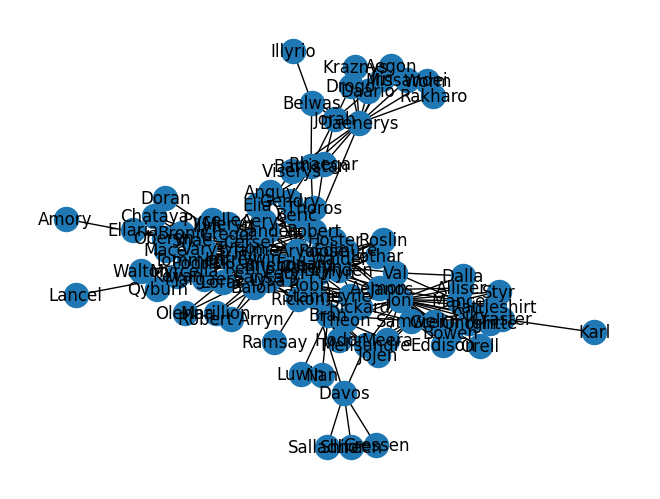

In [27]:
#visualize the graph

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()




In [28]:
#calculate the density of the graph

nx.density(G)


0.062070181625815554

In [29]:
#return highest degree nodes

sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Tyrion', 36),
 ('Jon', 26),
 ('Sansa', 26),
 ('Robb', 25),
 ('Jaime', 24),
 ('Tywin', 22),
 ('Cersei', 20),
 ('Arya', 19),
 ('Robert', 18),
 ('Joffrey', 18),
 ('Catelyn', 18),
 ('Samwell', 15),
 ('Bran', 14),
 ('Stannis', 14),
 ('Daenerys', 14),
 ('Sandor', 13),
 ('Mance', 12),
 ('Gregor', 12),
 ('Eddard', 12),
 ('Lysa', 10),
 ('Loras', 9),
 ('Brynden', 8),
 ('Walder', 8),
 ('Edmure', 8),
 ('Renly', 8),
 ('Oberyn', 7),
 ('Brienne', 7),
 ('Petyr', 7),
 ('Meryn', 7),
 ('Varys', 7),
 ('Margaery', 7),
 ('Beric', 6),
 ('Rickon', 6),
 ('Balon', 6),
 ('Barristan', 6),
 ('Ilyn', 6),
 ('Jorah', 6),
 ('Rhaegar', 6),
 ('Janos', 6),
 ('Kevan', 6),
 ('Aemon', 5),
 ('Thoros', 5),
 ('Meera', 5),
 ('Podrick', 5),
 ('Lothar', 5),
 ('Elia', 5),
 ('Shae', 5),
 ('Craster', 5),
 ('Davos', 5),
 ('Tommen', 5),
 ('Qhorin', 5),
 ('Grenn', 4),
 ('Aerys', 4),
 ('Gendry', 4),
 ('Roose', 4),
 ('Belwas', 4),
 ('Hodor', 4),
 ('Jojen', 4),
 ('Theon', 4),
 ('Bronn', 4),
 ('Roslin', 4),
 ('Pycelle', 4),
 ('Daario', 

In [30]:

#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())





3a. explore this dataframe, are there huge differences between these types of centrality? What might cause this?

In [31]:
df

,node,degree,betweenness,closeness,eigenvector
0,Aemon,0.047170,0.004623,0.389706,0.044139
1,Grenn,0.037736,0.000060,0.330218,0.019480
2,Samwell,0.141509,0.032273,0.384058,0.054346
3,Aerys,0.037736,0.000000,0.392593,0.078330
4,Jaime,0.226415,0.099943,0.479638,0.273663
...,...,...,...,...,...
102,Ramsay,0.009434,0.000000,0.329193,0.018535
103,Chataya,0.018868,0.000000,0.340836,0.031102
104,Shireen,0.009434,0.000000,0.250000,0.001142
105,Doran,0.009434,0.000000,0.339744,0.025483


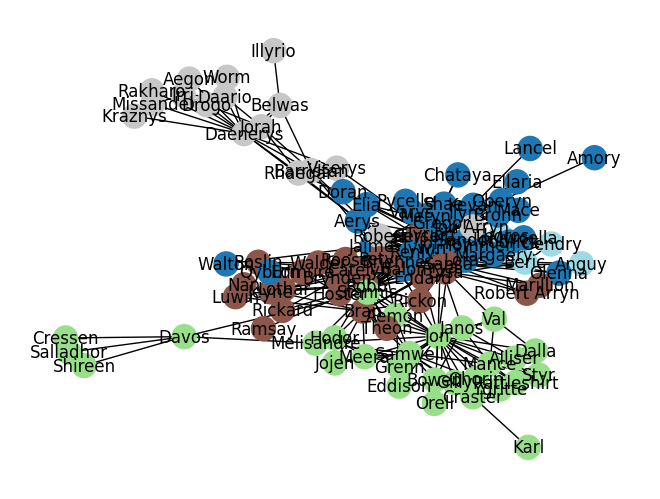

In [32]:
#calculate community structure
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()


Part 4: make your own social network. Take either a short excerpt of a novel, tv show, movie, or real life social network you are familiar with. Make a csv modelled off of the got-edges.csv with a Source, Target, and weight column. You need to decide what constitutes an edge and node, but easiest is characters or people connected by their number of interactions. You should manually type this into the csv. Include at least 25 edges

What kind of potential issues did you run into while converting it into a graph? Any ambiguities that made it difficult to decide? 

use either Gephi or NetworkX to calculate node centrality and community features and add a visualization of the graph here. Does it align with your understanding of the media? 

A key issue could be deciding what counts as an interaction. Alot of these can be vauge or unclear making it hard to consistently define edges in the graph.

yes I would say it does align with my understanding of the media

In [34]:
import pandas as pd

# Create the data
data = [
    ["Michael", "Dwight", 20],
    ["Michael", "Jim", 15],
    ["Michael", "Pam", 10],
    ["Michael", "Ryan", 12],
    ["Michael", "Jan", 8],
    ["Dwight", "Jim", 18],
    ["Jim", "Pam", 20],
    ["Jim", "Dwight", 15],
    ["Pam", "Angela", 7],
    ["Angela", "Oscar", 9],
    ["Kevin", "Oscar", 10],
    ["Kevin", "Angela", 8],
    ["Dwight", "Angela", 12],
    ["Michael", "Kevin", 7],
    ["Creed", "Meredith", 5],
    ["Creed", "Dwight", 4],
    ["Meredith", "Oscar", 6],
    ["Phyllis", "Stanley", 14],
    ["Phyllis", "Pam", 9],
    ["Stanley", "Michael", 6],
    ["Ryan", "Kelly", 13],
    ["Kelly", "Angela", 5],
    ["Toby", "Michael", 6],
    ["Toby", "Pam", 8],
    ["Toby", "Jim", 10],
    ["Jan", "Holly", 5]
]

# Save to CSV
df = pd.DataFrame(data, columns=["Source", "Target", "Weight"])
df.to_csv("the_office_edges.csv", index=False)


In [37]:
edges = pd.read_csv("the_office_edges.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')



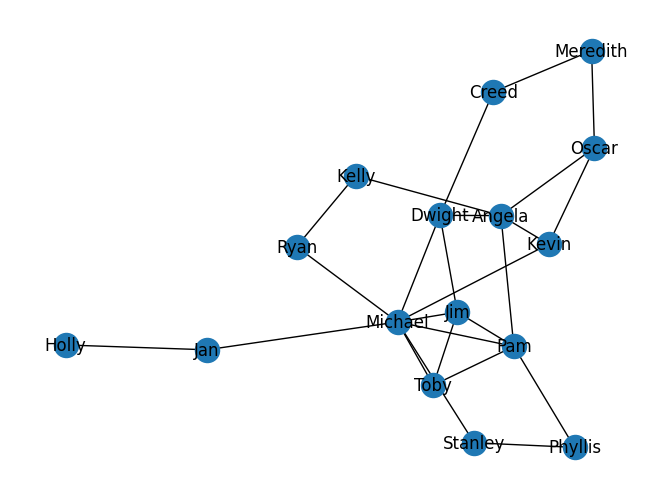

In [38]:
G.number_of_edges()

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()

In [39]:
nx.density(G)


sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Michael', 8),
 ('Pam', 5),
 ('Angela', 5),
 ('Dwight', 4),
 ('Jim', 4),
 ('Oscar', 3),
 ('Kevin', 3),
 ('Toby', 3),
 ('Ryan', 2),
 ('Jan', 2),
 ('Creed', 2),
 ('Meredith', 2),
 ('Phyllis', 2),
 ('Stanley', 2),
 ('Kelly', 2),
 ('Holly', 1)]

In [41]:

dfoffice=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])

dfoffice['betweenness'] = list(nx.betweenness_centrality(G).values())

dfoffice['closeness'] = list(nx.closeness_centrality(G).values())

dfoffice['eigenvector'] = list(nx.eigenvector_centrality(G).values())

dfoffice


,node,degree,betweenness,closeness,eigenvector
0,Michael,0.533333,0.507143,0.652174,0.502890
1,Dwight,0.266667,0.170635,0.535714,0.307195
2,Jim,0.266667,0.023016,0.500000,0.371741
3,Pam,0.333333,0.143651,0.535714,0.394793
4,Ryan,0.133333,0.046032,0.441176,0.149684
5,Jan,0.133333,0.133333,0.428571,0.131191
6,Angela,0.333333,0.173810,0.517241,0.289101
7,Oscar,0.200000,0.080952,0.428571,0.140788
8,Kevin,0.200000,0.087302,0.500000,0.228711
9,Creed,0.133333,0.046032,0.384615,0.089146


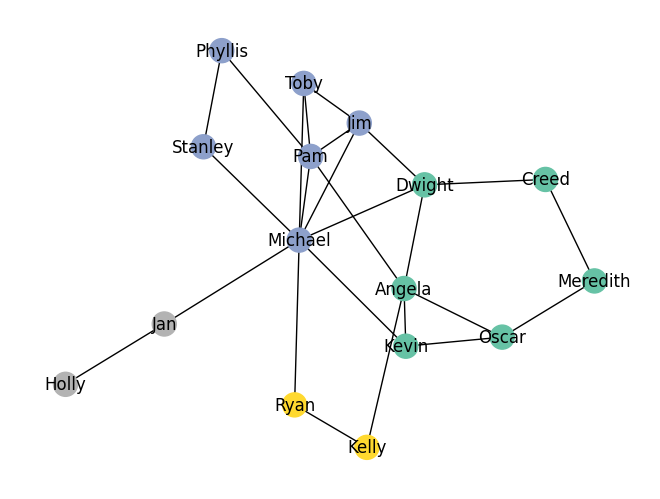

In [45]:
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

community_map = {}
for i, com in enumerate(communities):
    for name in com:
        community_map[name] = i

colors = [community_map[n] for n in G.nodes]
nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set2)